In [7]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy
import tensorflow as tf

from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
import kagglehub

In [8]:
path = kagglehub.dataset_download("leadbest/googlenewsvectorsnegative300")

print("Path to dataset files:", path)

embedding_file = '/root/.cache/kagglehub/datasets/leadbest/googlenewsvectorsnegative300/versions/2/GoogleNews-vectors-negative300.bin.gz'

Path to dataset files: /kaggle/input/googlenewsvectorsnegative300


In [9]:
word_vectors = KeyedVectors.load_word2vec_format(embedding_file, binary=True, limit=200000)

vector = word_vectors['apple']
print(vector)
similar = word_vectors.most_similar('apple')
print(similar)


[-0.06445312 -0.16015625 -0.01208496  0.13476562 -0.22949219  0.16210938
  0.3046875  -0.1796875  -0.12109375  0.25390625 -0.01428223 -0.06396484
 -0.08056641 -0.05688477 -0.19628906  0.2890625  -0.05151367  0.14257812
 -0.10498047 -0.04736328 -0.34765625  0.35742188  0.265625    0.00188446
 -0.01586914  0.00195312 -0.35546875  0.22167969  0.05761719  0.15917969
  0.08691406 -0.0267334  -0.04785156  0.23925781 -0.05981445  0.0378418
  0.17382812 -0.41796875  0.2890625   0.32617188  0.02429199 -0.01647949
 -0.06494141 -0.08886719  0.07666016 -0.15136719  0.05249023 -0.04199219
 -0.05419922  0.00108337 -0.20117188  0.12304688  0.09228516  0.10449219
 -0.00408936 -0.04199219  0.01409912 -0.02111816 -0.13476562 -0.24316406
  0.16015625 -0.06689453 -0.08984375 -0.07177734 -0.00595093 -0.00482178
 -0.00089264 -0.30664062 -0.0625      0.07958984 -0.00909424 -0.04492188
  0.09960938 -0.33398438 -0.3984375   0.05541992 -0.06689453 -0.04467773
  0.11767578 -0.13964844 -0.26367188  0.17480469 -0.

In [10]:
pizza = word_vectors['pizza']
print(f'Vector dimension: {pizza.shape}')
print(pizza)

Vector dimension: (300,)
[-1.25976562e-01  2.53906250e-02  1.66992188e-01  5.50781250e-01
 -7.66601562e-02  1.28906250e-01  1.02539062e-01 -3.94821167e-04
  1.21582031e-01  4.32128906e-02  1.72851562e-01 -6.83593750e-02
  3.41796875e-01  8.39843750e-02  6.68945312e-02  2.67578125e-01
 -3.71093750e-02 -5.56640625e-02  1.80664062e-01  1.90429688e-02
 -5.07812500e-02  9.03320312e-03  1.76757812e-01  6.49414062e-02
 -6.25000000e-02 -9.42382812e-02 -9.71679688e-02  4.00390625e-01
  1.15234375e-01  1.02539062e-01 -1.86767578e-02 -2.69531250e-01
  1.80664062e-01  1.25000000e-01 -3.17382812e-02 -5.49316406e-02
  3.45703125e-01 -1.57470703e-02  1.82390213e-05  2.07031250e-01
 -1.25976562e-01 -2.83203125e-01  2.00195312e-01  8.34960938e-02
 -4.73632812e-02 -3.11279297e-02 -2.61718750e-01  1.69921875e-01
 -2.02636719e-02  1.53320312e-01 -1.20605469e-01  3.75000000e-01
 -5.68847656e-02 -4.76074219e-03 -1.95312500e-01 -2.03125000e-01
  3.00781250e-01 -1.01074219e-01 -3.18359375e-01 -9.03320312e-02


In [11]:
print(word_vectors.similarity('pizza', 'tomato'))
print(word_vectors.similarity('pizza', 'sauce'))
print(word_vectors.similarity('pizza', 'cheese'))
print(word_vectors.similarity('pizza', 'burger'))
print(word_vectors.similarity('pizza', 'car'))
print(word_vectors.similarity('pizza', 'restaurant'))
print(word_vectors.similarity('pizza', 'Italy'))
print(word_vectors.similarity('pizza', 'computer'))

0.35505623
0.36959887
0.4708358
0.65696925
0.23794846
0.5359172
0.17121246
0.15807031


In [12]:
word_vectors.n_similarity("king rules kingdom".split(), "monarch governs empire".split())
word_vectors.n_similarity("dog bites man".split(), "man bites dog".split())

1.0

In [13]:
s1 = "Apple plans to increase iPhone production in India".lower().split()
print(s1)
s2 = "Samsung to launch new Galaxy phones with foldable screens".lower().split()
print(s2)
word_vectors.n_similarity(s1, s2)

['apple', 'plans', 'to', 'increase', 'iphone', 'production', 'in', 'india']
['samsung', 'to', 'launch', 'new', 'galaxy', 'phones', 'with', 'foldable', 'screens']


0.4027268

In [14]:
word_vectors.most_similar(positive=['king'], topn=10)

[('kings', 0.7138045430183411),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('throne', 0.5422105193138123),
 ('royal', 0.5239794254302979)]

In [15]:
word_vectors.most_similar(positive=['king', 'woman'], negative=['man'], topn=10)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454),
 ('royal_palace', 0.5087166428565979)]

In [16]:
word_vectors.doesnt_match(["cat", "dog", "hamster", "car", "rabbit"])


'car'

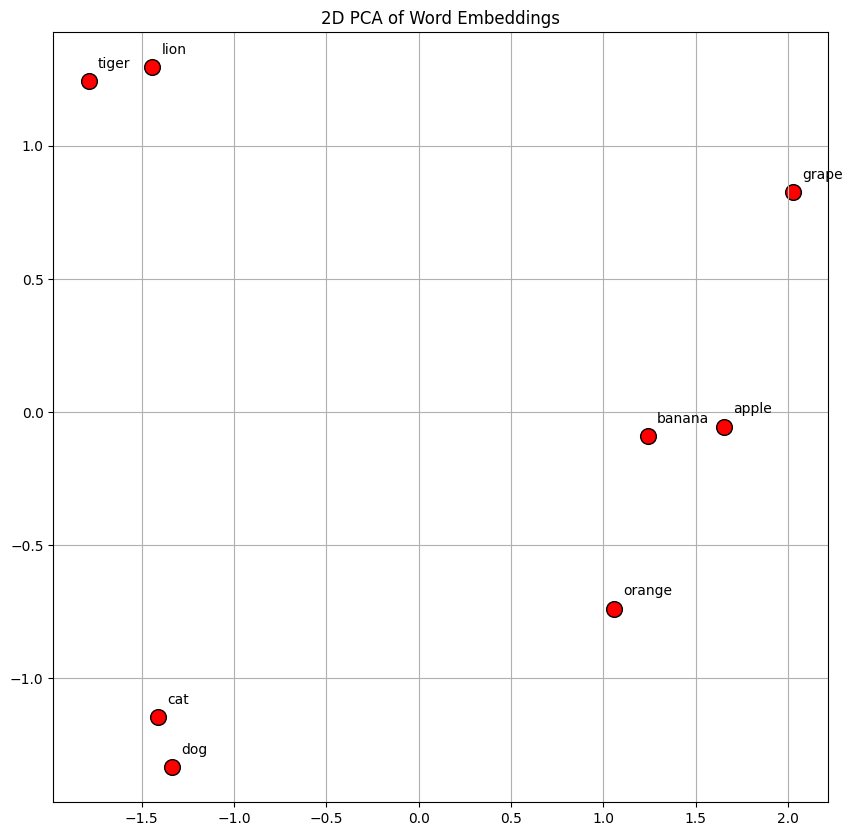

In [17]:
def display_pca_scatterplot(model, word_list):
    # Extract word vectors from the model
    vectors = np.array([model[word] for word in word_list])

    # Reduce dimensions from high-dimensional space (300) to 2D
    reduced_vectors = PCA(n_components=2).fit_transform(vectors)

    # Plot the 2D vectors
    plt.figure(figsize=(10, 10))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c='r', edgecolors='k', s=128)

    # Label each point with the corresponding word
    for word, (x, y) in zip(word_list, reduced_vectors):
        plt.text(x + 0.05, y + 0.05, word)

    plt.title("2D PCA of Word Embeddings")
    plt.grid(True)
    plt.show()

words = ['apple', 'banana', 'orange', 'grape', 'dog', 'cat', 'lion', 'tiger']
display_pca_scatterplot(word_vectors, words)


In [18]:
word_vectors = KeyedVectors.load_word2vec_format(embedding_file, binary=True, limit=1000000)

In [19]:
word_vectors['king']
word_vectors.similarity('car', 'bus')
word_vectors.most_similar('apple')

[('apples', 0.720359742641449),
 ('pear', 0.6450697183609009),
 ('fruit', 0.6410146355628967),
 ('berry', 0.6302295327186584),
 ('pears', 0.613396167755127),
 ('strawberry', 0.6058260798454285),
 ('peach', 0.6025872826576233),
 ('potato', 0.5960935354232788),
 ('grape', 0.5935863852500916),
 ('blueberry', 0.5866668224334717)]

In [20]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz"

--2025-07-22 23:18:45--  https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.140.96, 3.5.16.38, 52.217.135.216, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.140.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166373201 (159M) [application/x-tar]
Saving to: ‘/root/input/yelp_review_polarity_csv.tgz’

yelp_review_polarit 100%[===================>] 158.67M  44.5MB/s    in 3.9s    

2025-07-22 23:18:49 (40.7 MB/s) - ‘/root/input/yelp_review_polarity_csv.tgz’ saved [166373201/166373201]



In [21]:
!tar xvzf /root/input/yelp_review_polarity_csv.tgz
!pwd

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv
/content


In [22]:
yelp_train = pd.read_csv('yelp_review_polarity_csv/train.csv', names=['sentiment', 'review'])
print(yelp_train.shape)
yelp_train.head()

(560000, 2)


,sentiment,review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


In [23]:
yelp_train = yelp_train.sample(frac=1, random_state=1)[:100000].copy()
print(yelp_train.shape)
yelp_train.head()

(100000, 2)


,sentiment,review
39658,2,"omg, the grandma g's pizza with rosemary chick..."
330033,1,Microwaved food over over over seasoned gyro m...
238898,1,"While the food is good, the service leaves a l..."
453536,1,Called the Chandler PD about the sign spinner ...
555973,2,"Just took Ewok, my approx. 6 month old shih tz..."


In [24]:
yelp_train['sentiment'].replace(to_replace=1, value=0, inplace=True)
yelp_train['sentiment'].replace(to_replace=2, value=1, inplace=True)
yelp_train.head()

/tmp/ipython-input-24-197833046.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  yelp_train['sentiment'].replace(to_replace=1, value=0, inplace=True)
/tmp/ipython-input-24-197833046.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

,sentiment,review
39658,1,"omg, the grandma g's pizza with rosemary chick..."
330033,0,Microwaved food over over over seasoned gyro m...
238898,0,"While the food is good, the service leaves a l..."
453536,0,Called the Chandler PD about the sign spinner ...
555973,1,"Just took Ewok, my approx. 6 month old shih tz..."


In [25]:
yelp_train_split, yelp_val_split = train_test_split(yelp_train, train_size=0.85, random_state=1)

# Training
X_train = yelp_train_split['review']
y_train = yelp_train_split['sentiment']

# Validation
X_val = yelp_val_split['review']
y_val = yelp_val_split['sentiment']

collections.Counter(y_train)

Counter({0: 42395, 1: 42605})

In [26]:
tokenizer = Tokenizer(num_words=20000,  # or adjust based on your vocab size
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True)

tokenizer.fit_on_texts(yelp_train_split['review'])
train_sequences = tokenizer.texts_to_sequences(yelp_train_split['review'])

X_train = keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=200)
y_train = yelp_train_split['sentiment'].astype('float32')  # ensure correct type

print(train_sequences[0])
tokenizer.word_index

[49, 14, 2261, 4283, 2013, 12, 2352, 16, 6, 59, 3093, 138, 4, 146, 1, 298, 1, 384, 377, 7, 8, 37, 6, 1, 120, 958, 16723, 1041, 33, 3063, 21, 1186, 12413, 3087, 1450, 5621, 56, 3266, 2, 106, 5622, 136, 901, 1, 2261, 272, 3, 90, 22, 1299, 958, 16723, 51, 185, 36, 60, 107, 3266, 9, 14, 808, 26, 358, 3, 150, 4, 152, 107, 65, 11, 47, 74, 1996, 1965, 42, 7, 1, 132, 5454, 24, 1947, 36, 5589, 21, 1, 11892, 1401, 1132, 6861, 13, 64, 266, 2, 317, 5, 1274, 3334, 4, 14, 369, 117, 6, 10, 1, 128, 275, 137, 2135, 7, 16, 14, 369, 2, 3, 150, 5, 157, 1724, 1062, 17, 149, 86, 329, 609, 1, 1119, 211, 1070, 51, 554, 796, 21, 1, 3944, 15, 26, 149, 18128, 2, 27, 150, 39, 15, 102, 1007, 18, 1, 1387, 55, 1, 6861, 5589, 2, 60, 39, 253, 102, 30, 286, 8, 162, 5, 43, 191, 46, 9, 958, 16723, 4, 1361, 65, 10, 686, 3, 102, 609, 2, 47, 64, 90, 283, 48, 64, 86, 124, 176, 1, 128, 18, 5, 555, 308, 1086, 13370, 13036, 17, 18, 1, 779, 13, 14, 369, 2, 3, 24, 286, 174, 367, 10, 828, 9, 107, 3, 78, 114, 39, 1, 5454, 24, 68, 4

{'the': 1,
 'and': 2,
 'i': 3,
 'to': 4,
 'a': 5,
 'was': 6,
 'of': 7,
 'it': 8,
 'for': 9,
 'in': 10,
 'is': 11,
 'n': 12,
 'that': 13,
 'my': 14,
 'we': 15,
 'this': 16,
 'but': 17,
 'with': 18,
 'they': 19,
 'you': 20,
 'on': 21,
 'not': 22,
 'have': 23,
 'had': 24,
 'at': 25,
 'were': 26,
 'so': 27,
 'are': 28,
 'food': 29,
 'be': 30,
 'place': 31,
 'there': 32,
 'me': 33,
 'good': 34,
 'as': 35,
 'out': 36,
 'all': 37,
 'like': 38,
 'if': 39,
 'just': 40,
 'our': 41,
 'one': 42,
 'very': 43,
 'get': 44,
 'here': 45,
 'time': 46,
 'when': 47,
 'up': 48,
 'from': 49,
 'great': 50,
 'or': 51,
 'service': 52,
 'would': 53,
 'back': 54,
 'about': 55,
 'their': 56,
 'no': 57,
 'go': 58,
 'an': 59,
 'what': 60,
 'really': 61,
 'he': 62,
 "it's": 63,
 'she': 64,
 'which': 65,
 'will': 66,
 'us': 67,
 'been': 68,
 'some': 69,
 'only': 70,
 'your': 71,
 'because': 72,
 'even': 73,
 'more': 74,
 'by': 75,
 'can': 76,
 'them': 77,
 "don't": 78,
 'got': 79,
 'after': 80,
 'other': 81,
 'do': 8

In [27]:
print([tokenizer.index_word[x] for x in train_sequences[1][:2]])
print(train_sequences[1][:2])
print(tokenizer.index_word[14])
print(tokenizer.index_word[382])
print(tokenizer.sequences_to_texts([[14]]))
print(tokenizer.sequences_to_texts([[382]]))
print(tokenizer.sequences_to_texts([train_sequences[0]])[0][:300])
print(X_train[0][:300])

['like', 'this']
[38, 16]
my
such
['my']
['such']
from my hospital feedback form n nwhile this was an unpleasant experience to say the least the worst part of it all was the way dr haslett treated me doctors on previous shifts introduced themselves discussed their plans and said goodbye before leaving the hospital however i did not meet dr haslett 
[  971     2   363    36   186   271    13    24   586    21    13   132
    73    47   958 16723   102    22   142     7     1   242    64     6
  6109     4     2    24     4    30  1772     7    75     1  5454   186
   271    64    24   106    28   242     3   282   102    23  2949    17
    22    13    22    10     5    31     3    24    68  2530     3   102
   503  8173    49     3    24    91   548  6922   136     2     3     6
    22   841     9     1 14151     7  4016     3     6   143    49     1
    46     3    24   426    25     1  2261     4   121     2  2051     4
   436   242   707    17   118   102   485  2051    80   171  104

In [28]:
# Tokenize and pad training reviews
train_sequences = tokenizer.texts_to_sequences(yelp_train_split['review'])
X_train = keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=200)

# Tokenize and pad validation reviews
val_sequences = tokenizer.texts_to_sequences(yelp_val_split['review'])
X_val = keras.preprocessing.sequence.pad_sequences(val_sequences, maxlen=200)

print(X_train.shape)
print(X_val.shape)

(85000, 200)
(15000, 200)


In [29]:
vocab_size = len(tokenizer.word_index) + 1

embedding_size = 300
pretrained_embeddings = np.zeros((vocab_size, embedding_size))

for term, index in tokenizer.word_index.items():
    if word_vectors.has_index_for(term):
        pretrained_embeddings[index] = word_vectors[term].copy()

print(pretrained_embeddings[tokenizer.word_index['good']][:50])

[ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891]


In [30]:
embedding_layer = keras.layers.Embedding(
    input_dim=vocab_size,
    output_dim=embedding_size,
    embeddings_initializer=keras.initializers.Constant(pretrained_embeddings),
    input_length=200,
    trainable=True  #
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
tf.random.set_seed(0)

text_classifier = keras.Sequential()

# This layer will output a sequence of 300-dimensional vectors (one per word).
text_classifier.add(embedding_layer)

# This layer averages the word vectors into a single vector per review
text_classifier.add(layers.GlobalAveragePooling1D())

text_classifier.add(layers.Dense(128, activation='relu',
                                 kernel_initializer=tf.keras.initializers.RandomNormal(seed=1)))
text_classifier.add(layers.Dense(64, activation='relu',
                                 kernel_initializer=tf.keras.initializers.RandomNormal(seed=1)))
text_classifier.add(layers.Dense(1, activation='sigmoid',
                                 kernel_initializer=tf.keras.initializers.RandomNormal(seed=1)))

text_classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [32]:
# Sample input review
sample_review = "football is good game"
print(f"Review: {sample_review}")

# Convert the review into a sequence of token IDs
sample_sequence = tokenizer.texts_to_sequences([sample_review])
print(f"Tokenized sequence: {sample_sequence}")

# Pass the sequence through the embedding layer
sample_input_array = np.array(sample_sequence)
embedded_output = embedding_layer(sample_input_array)

# Print the shape of the embedding output
batch_size, seq_len, embed_dim = embedded_output.shape
print(f"Embedding shape → (Batch size: {batch_size}, Sequence length: {seq_len}, Embedding size: {embed_dim})")

# Compute the average embedding (pooled representation)
avg_embedding = np.mean(embedded_output, axis=1)
print(f"Averaged embedding shape: {avg_embedding.shape}")


Review: football is good game
Tokenized sequence: [[2225, 11, 34, 738]]
Embedding shape → (Batch size: 1, Sequence length: 4, Embedding size: 300)
Averaged embedding shape: (1, 300)


In [33]:
text_classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (1, 4, 300)            │    29,035,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,035,800 (110.76 MB)

 Trainable params: 29,035,800 (110.76 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
training_history = text_classifier.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)


Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6571 - loss: 0.5914 - val_accuracy: 0.8845 - val_loss: 0.2893
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8961 - loss: 0.2614 - val_accuracy: 0.8935 - val_loss: 0.2515
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9188 - loss: 0.2089 - val_accuracy: 0.9095 - val_loss: 0.2239
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9280 - loss: 0.1863 - val_accuracy: 0.9203 - val_loss: 0.2056
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9347 - loss: 0.1709 - val_accuracy: 0.9200 - val_loss: 0.2069
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9391 - loss: 0.1640 - val_accuracy: 0.9229 - val_loss: 0.2020
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9372 - loss: 0.1652 - val_accuracy: 0.8739 - val_loss: 0.2959
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9247 - loss: 0.1860 - val_accu

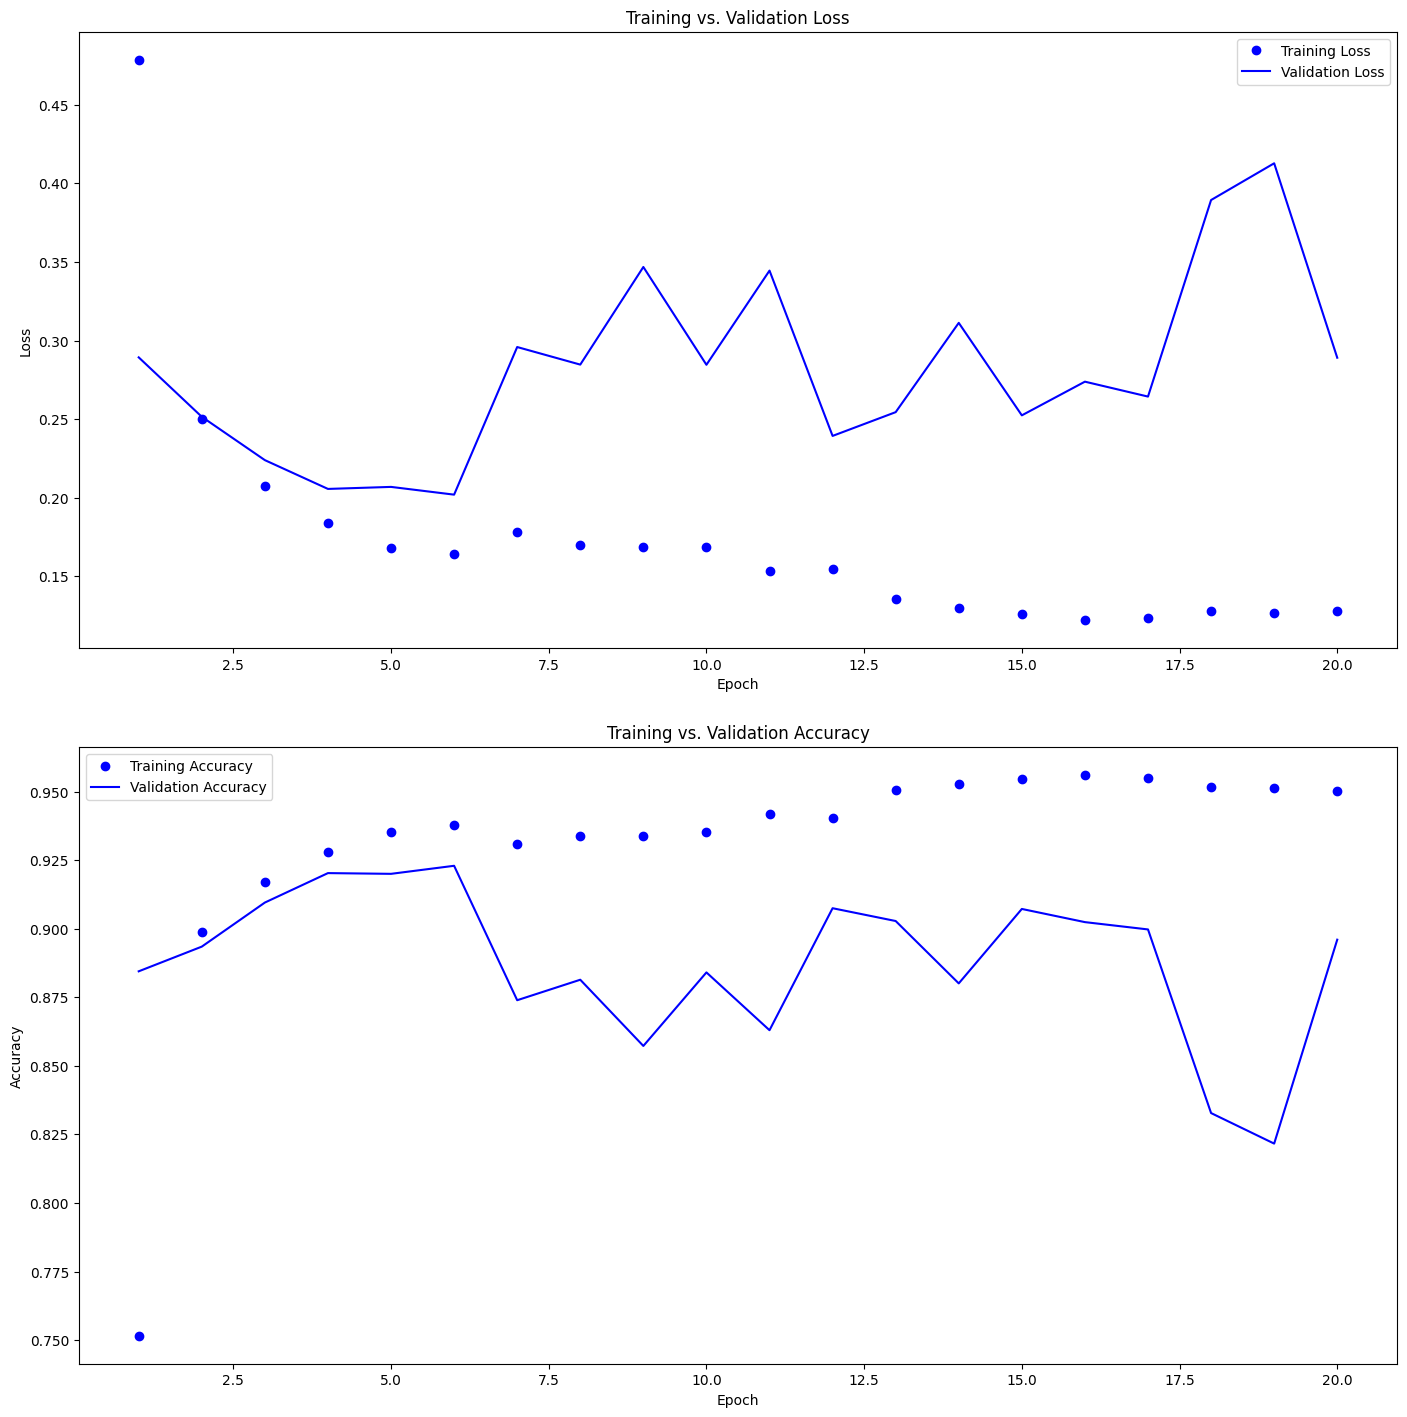

In [35]:
def plot_model_performance(training_history):
    train_loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    train_acc = training_history.history['accuracy']
    val_acc = training_history.history['val_accuracy']

    num_epochs = range(1, len(train_loss) + 1)

    import matplotlib.pyplot as plt
    fig, (loss_ax, acc_ax) = plt.subplots(2)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    fig.tight_layout(pad=5.0)

    # Plot training vs. validation loss
    loss_ax.plot(num_epochs, train_loss, 'bo', label='Training Loss')
    loss_ax.plot(num_epochs, val_loss, 'b', label='Validation Loss')
    loss_ax.set_title('Training vs. Validation Loss')
    loss_ax.set_xlabel('Epoch')
    loss_ax.set_ylabel('Loss')
    loss_ax.legend()

    # Plot training vs. validation accuracy
    acc_ax.plot(num_epochs, train_acc, 'bo', label='Training Accuracy')
    acc_ax.plot(num_epochs, val_acc, 'b', label='Validation Accuracy')
    acc_ax.set_title('Training vs. Validation Accuracy')
    acc_ax.set_xlabel('Epoch')
    acc_ax.set_ylabel('Accuracy')
    acc_ax.legend()

    plt.show()
plot_model_performance(training_history)

In [36]:
text_embedding_layer = layers.Embedding(
    input_dim=vocab_size,
    output_dim=embedding_size,
    embeddings_initializer=keras.initializers.Constant(pretrained_embeddings),
    input_length=200,
    trainable=True
)

text_classifier = keras.Sequential()
text_classifier.add(text_embedding_layer)
text_classifier.add(layers.GlobalAveragePooling1D())
text_classifier.add(layers.Dense(128, activation='relu'))
text_classifier.add(layers.Dense(64, activation='relu'))
text_classifier.add(layers.Dense(1, activation='sigmoid'))

text_classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = text_classifier.fit(
    X_train,
    y_train,
    epochs=3,
    batch_size=512,
    validation_data=(X_val, y_val)
)


Epoch 1/3
167/167 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.6970 - loss: 0.5498 - val_accuracy: 0.8831 - val_loss: 0.2743
Epoch 2/3
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9011 - loss: 0.2476 - val_accuracy: 0.8413 - val_loss: 0.3601
Epoch 3/3
167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9128 - loss: 0.2148 - val_accuracy: 0.8716 - val_loss: 0.3035


In [37]:
# Load test data
yelp_test = pd.read_csv('yelp_review_polarity_csv/test.csv', names=['sentiment', 'review'])

# Fix sentiment labels
yelp_test['sentiment'] = yelp_test['sentiment'].replace({1: 0, 2: 1})

# Tokenize and pad reviews
X_test = tokenizer.texts_to_sequences(yelp_test['review'])
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=200)

# Convert labels to float32 numpy array
y_test = yelp_test['sentiment'].astype('float32').values

# Evaluate model
test_loss, test_accuracy = text_classifier.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2%}")


1188/1188 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8728 - loss: 0.2961
Test Accuracy: 87.88%


In [38]:
def predict_sentiment(review_list):
    encoded_sequences = tokenizer.texts_to_sequences(review_list)
    padded_sequences = keras.preprocessing.sequence.pad_sequences(encoded_sequences, maxlen=200)
    predictions = text_classifier.predict(padded_sequences)
    return predictions

# Real reviews from Google Reviews.
pos_review = "The best seafood joint in East Village San Diego!  Great lobster roll, great fish, great oysters, great bread, great cocktails, and such amazing service.  The atmosphere is top notch and the location is so much fun being located just a block away from Petco Park (San Diego Padres Stadium)."
neg_review = "A thoroughly disappointing experience. When you book a Marriott you expect a certain standard. Albany falls way short. Room cleaning has to be booked 24 hours in advance but nobody thought to mention this at check in. The hotel is tired and needs a face-lift. The only bright light in a sea of mediocrity were the pancakes at breakfast. Sadly they weren't enough to save the experience. If you travel to Albany, then do yourself a big favour and book the Westin."

sample_reviews = [pos_review, neg_review]
results = predict_sentiment(sample_reviews)

for review, score in zip(sample_reviews, results):
    sentiment = "Positive" if score >= 0.5 else "Negative"
    print(f"{sentiment} ({score[0]:.2f}): {review[:100]}...")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
Positive (1.00): The best seafood joint in East Village San Diego!  Great lobster roll, great fish, great oysters, gr...
Negative (0.05): A thoroughly disappointing experience. When you book a Marriott you expect a certain standard. Alban...
